In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

##import pandas_profiling
##from pandas_profiling import ProfileReport

In [2]:
game = pd.read_csv("C:/Users/keati/Documents/Cosc301/Nhl_Data/game.csv")
team_info = pd.read_csv("C:/Users/keati/Documents/Cosc301/Nhl_Data/team_info.csv")

team_info.head()
game_team_stats = pd.read_csv("C:/Users/keati/Documents/Cosc301/Nhl_Data/game_teams_stats.csv")

In [3]:
game

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26300,2018030415,20182019,P,2019-06-07T00:00:00Z,19,6,2,1,away win REG,left,TD Garden,/api/v1/venues/5085,America/New_York,-5,EST
26301,2018030416,20182019,P,2019-06-10T00:00:00Z,6,19,5,1,away win REG,left,Enterprise Center,/api/v1/venues/5076,America/Chicago,-6,CST
26302,2018030416,20182019,P,2019-06-10T00:00:00Z,6,19,5,1,away win REG,left,Enterprise Center,/api/v1/venues/5076,America/Chicago,-6,CST
26303,2018030417,20182019,P,2019-06-13T00:00:00Z,19,6,4,1,away win REG,left,TD Garden,/api/v1/venues/5085,America/New_York,-5,EST


In [4]:
game_team_stats = pd.read_csv("C:/Users/keati/Documents/Cosc301/Nhl_Data/game_teams_stats.csv")
game_team_stats.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


In [5]:
x = game_team_stats.groupby(['head_coach','team_id']).sum().reset_index().drop(['game_id'], axis = 'columns')
x.head()

,head_coach,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
0,Adam Oates,1,20,100.0,1077.0,988.0,431.0,107.0,19.0,2174.1,318.0,256.0,601.0
1,Adam Oates,15,68,383.0,3989.0,3239.0,1552.0,471.0,115.0,6745.5,1088.0,928.0,2106.0
2,Al Arbour,2,1,4.0,32.0,19.0,10.0,4.0,0.0,0.0,14.0,10.0,17.0
3,Al MacNeil,20,4,21.0,293.0,49.0,169.0,52.0,6.0,0.0,0.0,0.0,0.0
4,Alain Nasreddine,1,38,240.0,2634.0,1730.0,846.0,274.0,58.0,4002.4,868.0,638.0,1414.0


In [6]:
Reduced_Team_Inf = team_info.drop(['franchiseId','abbreviation','link'],axis='columns')
y = Reduced_Team_Inf.sort_values(by='team_id',ascending=True).reset_index(drop=True)
y.head()

,team_id,shortName,teamName
0,1,New Jersey,Devils
1,2,NY Islanders,Islanders
2,3,NY Rangers,Rangers
3,4,Philadelphia,Flyers
4,5,Pittsburgh,Penguins


In [7]:
q = pd.merge(y,x, how='inner')
q

,team_id,shortName,teamName,head_coach,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
0,1,New Jersey,Devils,Adam Oates,20,100.0,1077.0,988.0,431.0,107.0,19.0,2174.1,318.0,256.0,601.0
1,1,New Jersey,Devils,Alain Nasreddine,38,240.0,2634.0,1730.0,846.0,274.0,58.0,4002.4,868.0,638.0,1414.0
2,1,New Jersey,Devils,Brent Sutter,97,436.0,5060.0,2919.0,2032.0,627.0,108.0,0.0,989.0,974.0,1800.0
3,1,New Jersey,Devils,Claude Julien,47,200.0,2268.0,1304.0,801.0,355.0,63.0,0.0,825.0,622.0,1079.0
4,1,New Jersey,Devils,Jacques Lemaire,77,330.0,3822.0,2471.0,1225.0,406.0,68.0,2494.1,1094.0,805.0,1479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,52,Winnipeg,Jets,Paul Maurice,371,2121.0,21796.0,17277.0,6835.0,2197.0,447.0,35226.4,6913.0,4990.0,9926.0
229,53,Arizona,Coyotes,Dave Tippett,89,564.0,6940.0,6402.0,2594.0,765.0,137.0,12678.6,1610.0,1376.0,3636.0
230,53,Arizona,Coyotes,Rick Tocchet,181,1048.0,12398.0,9307.0,2868.0,1241.0,213.0,19516.9,3512.0,2677.0,6034.0
231,54,Vegas,Golden Knights,Gerard Gallant,204,1163.0,12768.0,10419.0,3051.0,1107.0,219.0,18803.7,3439.0,4043.0,5371.0


C:\Users\keati\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goals', ylabel='Density'>

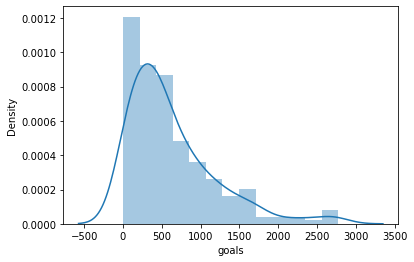

In [8]:
sns.distplot(q['goals'])

<AxesSubplot:>

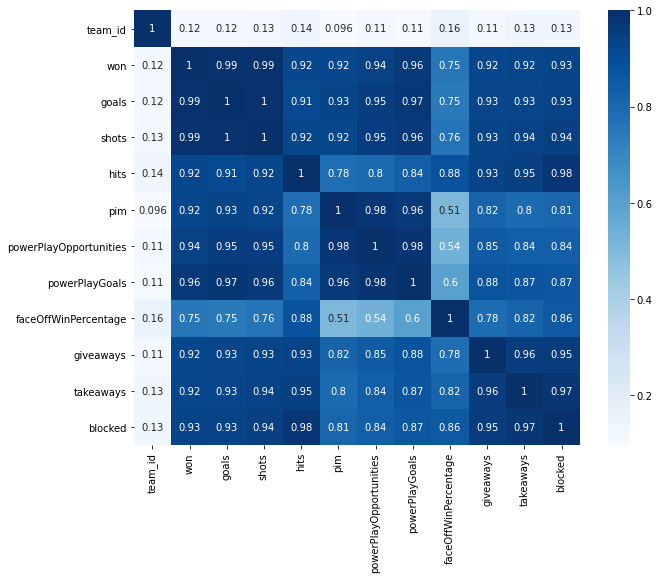

In [9]:
plt.figure(figsize=(10,8))
z = q.corr()
sns.heatmap(z, annot=True, cmap='Blues')

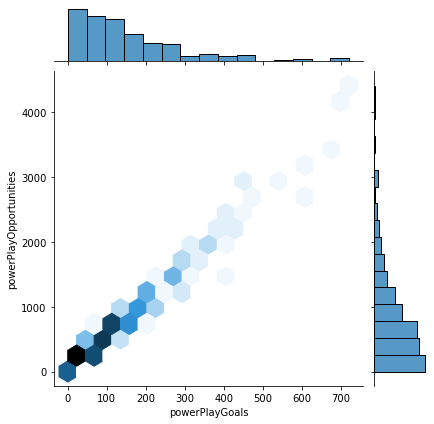

In [10]:
sns.jointplot(x='powerPlayGoals', y='powerPlayOpportunities', data=q,kind='hex')

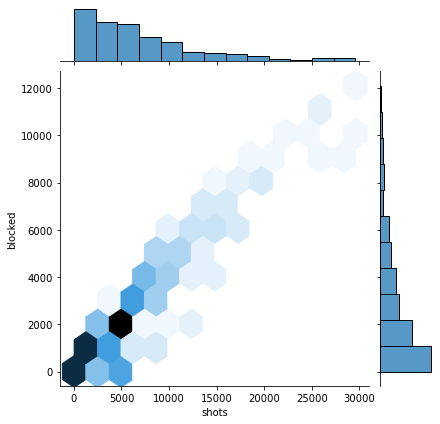

In [11]:
sns.jointplot(x='shots', y='blocked', data=q,kind='hex')

In [12]:
##q.profile_report()

<AxesSubplot:xlabel='won', ylabel='head_coach'>

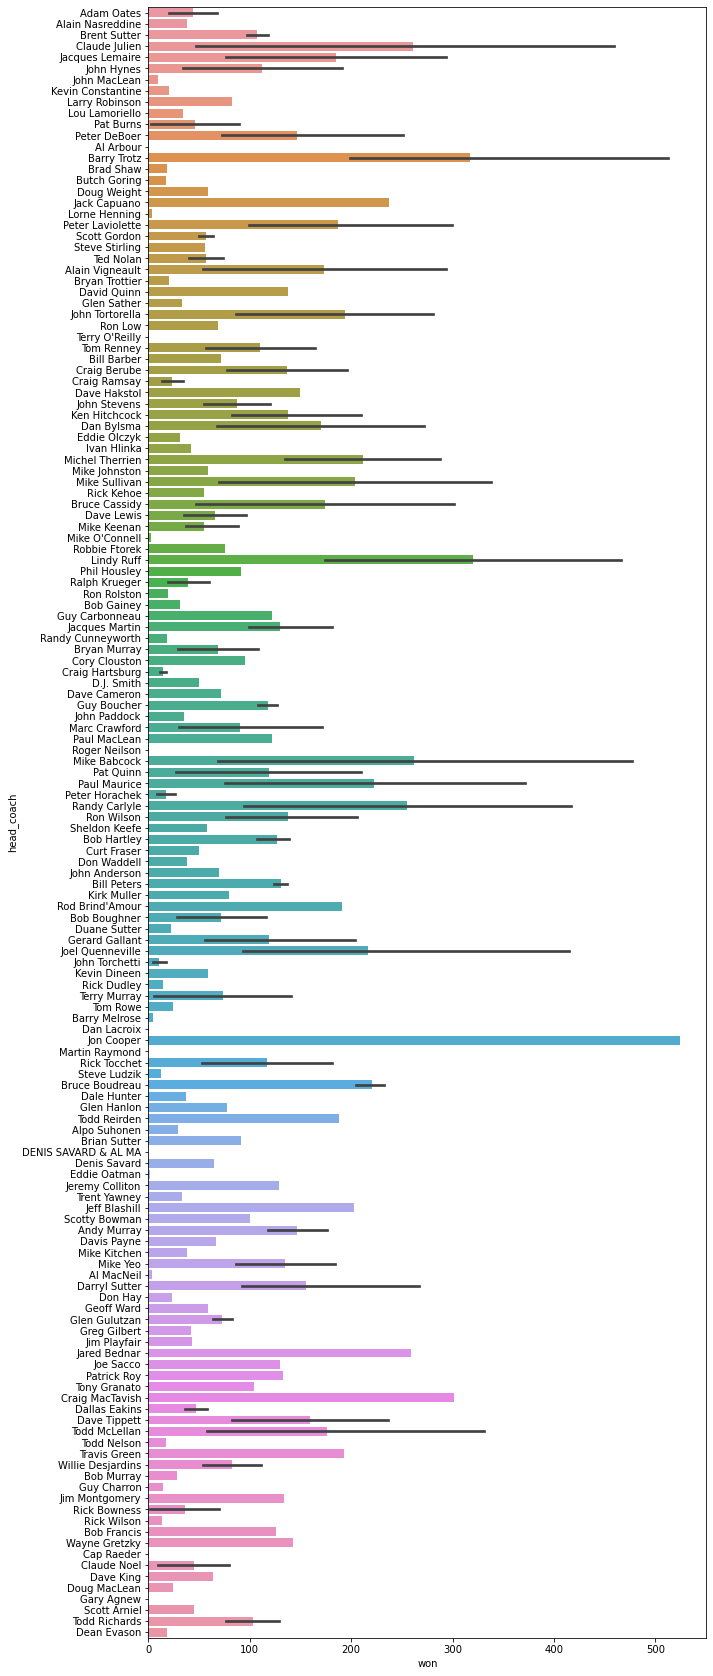

In [13]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x='won',y='head_coach',data=q)

In [14]:
k = q.groupby(["won",'teamName'])['head_coach'].max().reset_index()
k

,won,teamName,head_coach
0,0,Blackhawks,DENIS SAVARD & AL MA
1,0,Blue Jackets,Gary Agnew
2,0,Lightning,Martin Raymond
3,1,Islanders,Al Arbour
4,1,Lightning,Dan Lacroix
...,...,...,...
226,466,Sabres,Lindy Ruff
227,477,Red Wings,Mike Babcock
228,509,Blackhawks,Joel Quenneville
229,512,Predators,Barry Trotz


Text(0.5, 1.0, 'Most Wins for each Team')

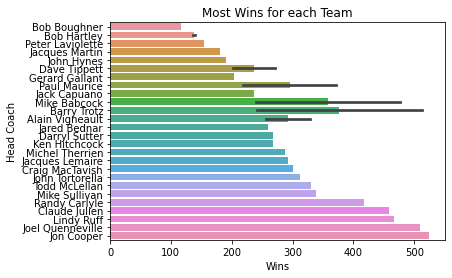

In [15]:
Most_wins = k.sort_values('won').drop_duplicates('teamName', keep = 'last').reset_index(drop=True)
sns.barplot(x='won',y='head_coach',data=Most_wins,linewidth=4)
plt.xlabel("Wins")
plt.ylabel("Head Coach")
plt.title("Most Wins for each Team")

In [16]:
Most = q.sort_values('won').drop_duplicates('teamName', keep = 'last').reset_index(drop=True)
Most

,team_id,shortName,teamName,head_coach,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
0,13,Florida,Panthers,Bob Boughner,116,773.0,8233.0,5455.0,2275.0,787.0,191.0,12343.7,3544.0,2244.0,3448.0
1,11,Atlanta,Thrashers,Bob Hartley,136,852.0,8247.0,4847.0,4638.0,1548.0,260.0,0.0,3076.0,2355.0,3865.0
2,20,Calgary,Flames,Bob Hartley,139,823.0,8420.0,6429.0,2967.0,965.0,171.0,14436.7,2969.0,2436.0,5222.0
3,4,Philadelphia,Flyers,Peter Laviolette,154,878.0,9188.0,7380.0,4554.0,1122.0,221.0,11637.7,2318.0,1799.0,4591.0
4,9,Ottawa,Senators,Jacques Martin,181,1036.0,9763.0,2606.0,4768.0,1464.0,288.0,0.0,1323.0,822.0,1168.0
5,1,New Jersey,Devils,John Hynes,191,1185.0,13630.0,10349.0,4399.0,1480.0,268.0,22517.6,3790.0,3240.0,6282.0
6,27,Phoenix,Coyotes,Dave Tippett,202,1025.0,11946.0,9920.0,4124.0,1373.0,220.0,16105.3,2323.0,2285.0,5236.0
7,54,Vegas,Golden Knights,Gerard Gallant,204,1163.0,12768.0,10419.0,3051.0,1107.0,219.0,18803.7,3439.0,4043.0,5371.0
8,12,Carolina,Hurricanes,Paul Maurice,219,1345.0,15481.0,7012.0,6309.0,2384.0,389.0,4886.6,2104.0,2297.0,4213.0
9,2,NY Islanders,Islanders,Jack Capuano,237,1384.0,15562.0,13398.0,5549.0,1582.0,280.0,24758.7,4982.0,4579.0,8354.0


In [17]:
w = pd.merge(game_team_stats,game, how='inner')
p = w.groupby(['head_coach','team_id']).sum().reset_index().drop(['game_id'], axis = 'columns')
u = pd.merge(y,p, how='inner')
w

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,...,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,...,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,...,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,...,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,...,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,...,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62885,2018030417,6,home,False,REG,Bruce Cassidy,1.0,33.0,28.0,0.0,...,6,4,1,away win REG,left,TD Garden,/api/v1/venues/5085,America/New_York,-5,EST
62886,2018030417,19,away,True,REG,Craig Berube,4.0,20.0,36.0,2.0,...,6,4,1,away win REG,left,TD Garden,/api/v1/venues/5085,America/New_York,-5,EST
62887,2018030417,19,away,True,REG,Craig Berube,4.0,20.0,36.0,2.0,...,6,4,1,away win REG,left,TD Garden,/api/v1/venues/5085,America/New_York,-5,EST
62888,2018030417,6,home,False,REG,Bruce Cassidy,1.0,33.0,28.0,0.0,...,6,4,1,away win REG,left,TD Garden,/api/v1/venues/5085,America/New_York,-5,EST
